In [1]:
import numpy as np
import copy
import cv2 as cv
import gc
import random
from time import time

from math import sqrt
from matplotlib import pyplot as plt
from multiprocessing import Pool

from Painting import Painting
from Polygon import Polygon

In [2]:
def bgr_to_rgb(img):
    '''Converts open-cv img from BGR to RGB'''
    b, g, r = cv.split(img)
    return cv.merge((r, g, b))

In [3]:
path = 'img/'
filename = 'monalisa'
extension = '.jpeg'

img = cv.imread(path + filename + extension)

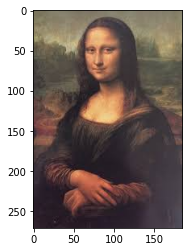

In [4]:
plt.imshow(bgr_to_rgb(img))

In [5]:
def k_way_tournament_selection(population, number_of_winners, K=3):
    selected = []
    while len(selected) < number_of_winners:
        fighters = random.choices(population, k=min(number_of_winners-len(selected), K))
        
        selected.append(min(fighters))
            
    return selected

In [6]:
POPULATION_SIZE = 100
DNA_SIZE = 100
SELECTION_RATIO = 0.3
TRUNCATION_RATIO = 0.5
CROSSOVER_RATIO = 0.5
MUTATION_RATIO = 0.3
MUTATION_CHANCE = 0.10
RECREATION_CHANCE = 0.3

In [ ]:
# Evolve!
epoch = 0

def save_img(painting, epoch):
    file = path + filename + '__epoch__' + str(epoch) + extension
    cv.imwrite(file, painting.canvas)

initial_time = time()
pop = Painting.random_population(POPULATION_SIZE, DNA_SIZE, img)

while True:

    
    # Fit in parallel:
    with Pool() as pool:
    #    try:
        fitted = pool.map(Painting.fit, pop)
    #    except KeyboardInterrupt:
    #        pool.close()
    #        exit(0)
    
    #pop = [p.fit() for p in pop]
    pop = sorted(list(fitted))
    
    # Save best
    best = pop[0]
    pop = pop[1:]
    
    save_img(best, epoch)
    
    # Truncate
    pop = pop[:int(1.0 - TRUNCATION_RATIO * POPULATION_SIZE)]
    
    # Select
    pop = k_way_tournament_selection(pop, int(SELECTION_RATIO * len(pop)), K=3)

    # Best can breed too.
    pop.append(best)
    
    new_population = []
    
    # Breed with best
    while len(new_population) + 1 < POPULATION_SIZE:
        father = random.choice(pop)
        mother = random.choice(pop)
        cross = Painting.crossover(father, mother, CROSSOVER_RATIO)
        
        cross.fit()
        
        new_population.append(cross)
        
    # Mutate everyone
    new_population = [p.mutate(RECREATION_CHANCE, MUTATION_CHANCE, MUTATION_RATIO, img).fit() for p in new_population]
    
    pop.extend(new_population)

    t = time()
    print(f'Epoch: {epoch} | Time elapsed: {round(t - initial_time, 2)}s | Pop size: {len(pop)} | Best RMSE: {best.fitness}')
    epoch += 1

Epoch: 0 | Time elapsed: 1.68s | Pop size: 115 | Best RMSE: 0.3691619666590315
Epoch: 1 | Time elapsed: 3.4s | Pop size: 119 | Best RMSE: 0.36400314421100805
Epoch: 2 | Time elapsed: 5.02s | Pop size: 120 | Best RMSE: 0.36400314421100805
Epoch: 3 | Time elapsed: 6.89s | Pop size: 121 | Best RMSE: 0.3583450596568231
Epoch: 4 | Time elapsed: 8.74s | Pop size: 121 | Best RMSE: 0.35833996774318894
Epoch: 5 | Time elapsed: 10.77s | Pop size: 121 | Best RMSE: 0.34933858817265895
Epoch: 6 | Time elapsed: 12.76s | Pop size: 121 | Best RMSE: 0.34933858817265895
Epoch: 7 | Time elapsed: 14.59s | Pop size: 121 | Best RMSE: 0.34933858817265895
Epoch: 8 | Time elapsed: 16.66s | Pop size: 121 | Best RMSE: 0.34933858817265895
Epoch: 9 | Time elapsed: 18.6s | Pop size: 121 | Best RMSE: 0.34933858817265895
Epoch: 10 | Time elapsed: 20.7s | Pop size: 121 | Best RMSE: 0.3452418510758431
Epoch: 11 | Time elapsed: 22.91s | Pop size: 121 | Best RMSE: 0.3452418510758431
Epoch: 12 | Time elapsed: 25.1s | Pop 